In [1]:
import pandas as pd

state_locations = pd.read_csv('state_locations.csv', index_col=0)
state_neighbors = pd.read_csv('state_neighbors.csv', index_col=0)

nodes_str = list(state_locations.index)
edges_str = state_neighbors.values.tolist()

nodes = list(range(len(nodes_str)))
edges = [(nodes_str.index(i[0]), nodes_str.index(i[1])) for i in edges_str]

In [2]:
def get_neighbors(vertex, edges):
    neighbors = []
    for i in edges:
        if i[0] == vertex:
            neighbors.append(i[1])
        elif i[1] == vertex:
            neighbors.append(i[0])
    return neighbors

def different_color(neighbors, color_map):
    colors = [True] * 6
    neighbor_colors = [color_map[i] for i in neighbors]
    for i in neighbor_colors:
        colors[i] = False
    for i in range(6):
        if colors[i] == True:
            return i

def remove_edges(vertex, edges):
    to_remove = []
    for i in range(len(edges)):
        if edges[i][0] == vertex:
            to_remove.append(i)
        elif edges[i][1] == vertex:
            to_remove.append(i)
    for i in to_remove[::-1]:
        edges.pop(i)

In [3]:
def six_color_recursion(nodes, edges, color_map):
    if len(nodes) == 1:
        color_map[nodes[0]] = 0
    else:
        for i in range(len(nodes)):
            neighbors = get_neighbors(nodes[i], edges)
            if len(neighbors) < 6:
                vertex = nodes.pop(i)
                remove_edges(vertex, edges)
                six_color_recursion(nodes, edges, color_map)
                color_map[vertex] = different_color(neighbors, color_map)
                break
                
def six_color(n, e):
    nodes = n.copy()
    edges = e.copy()
    color_map = [None] * len(nodes)
    six_color_recursion(nodes, edges, color_map)
    return color_map

In [4]:
import networkx as nx

g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']
color_map = [colors[i] for i in six_color(nodes, edges)]

pos = {}
for i in range(len(nodes)):
    pos[nodes[i]] = (state_locations['x'][i], state_locations['y'][i])

/Users/albertwang/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/albertwang/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/albertwang/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/albertwang/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.w

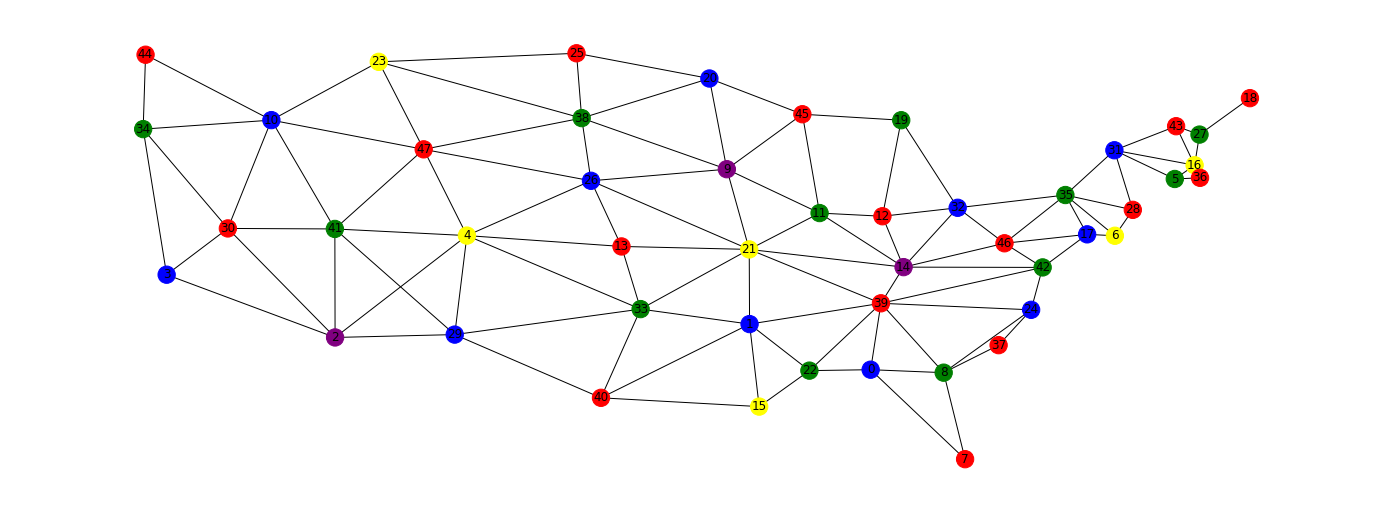

In [5]:
import matplotlib.pyplot as plt

fig_size = plt.rcParams['figure.figsize'] = [24, 18]
plt.axes().set_aspect('equal')
nx.draw(g, pos, node_color=color_map, with_labels=True)
plt.savefig('us_6_colors.png', dpi=300)
plt.show()